In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from k1lib.imports import *

In [3]:
class SkipBlock(nn.Module):
    def __init__(self, hiddenDim=10):
        super().__init__()
        def gen(): return nn.Linear(hiddenDim, hiddenDim), nn.LeakyReLU()
        self.seq = nn.Sequential(*gen(), *gen(), *gen())
    def forward(self, x):
        return self.seq(x) + x

In [4]:
class LinearBlock(nn.Module):
    def __init__(self, hiddenDim=10):
        super().__init__()
        def gen(): return nn.Linear(hiddenDim, hiddenDim), nn.LeakyReLU()
        self.seq = nn.Sequential(*gen(), *gen(), *gen())
    def forward(self, x):
        return self.seq(x)

In [5]:
class Network(nn.Module):
    def __init__(self, hiddenDim=10, blocks=2, block=SkipBlock):
        super().__init__()
        layers = []
        layers += [nn.Linear(1, hiddenDim), nn.LeakyReLU()]
        for i in range(blocks): layers += [block(hiddenDim)]
        layers += [nn.Linear(hiddenDim, 1)]
        self.bulk = nn.Sequential(*layers)
    def forward(self, x):
        return self.bulk(x)

In [6]:
def newL(bs=64, optF=None, *args, **kwargs):
    if optF == None: optF = lambda x: optim.SGD(x, lr=2e-4, momentum=0.9)
    if optF == "Adam": optF = lambda p: optim.Adam(p, lr=1e-2)
    l = k1lib.Learner()
    l.model = Network(*args, **kwargs)
    l.data = k1lib.data.Data.fromDataset(k1lib.data.FunctionDataset.exp, bs)
    l.opt = optF(l.model.parameters())
    l.lossF = lambda x, y: ((x.squeeze() - y)**2).mean()
    l.cbs.withModifyBatch(lambda x, y: (x[:, None], y))
    l.cbs.withDType(torch.float32);
    def evaluate(self):
        xbs, ybs, ys = self.record(1, 3)
        xbs = torch.vstack(xbs).squeeze()
        ybs = torch.vstack([yb[:, None] for yb in ybs]).squeeze()
        ys = torch.vstack(ys).squeeze()
        #plt.plot(xbs, ybs, ".")
        plt.plot(xbs, ys.detach(), ".")
    l.evaluate = partial(evaluate, l)
    l.cbs.withCancelOnLowLoss(1, epochMode=True)
    return l

In [7]:
l = newL(optF="Adam", blocks=10)
l.css = """SkipBlock #0: HookParam
SkipBlock: HookModule"""
l.run(10);

Progress:  20%, epoch:  1/10, batch: 152/157, elapsed:   2.82s  Run cancelled: Low loss 1 achieved!.
Saved to autosave-2.pth


In [22]:
a = torch.rand(32, 10)
b = torch.round(torch.rand(1, 10))

In [24]:
a*b

tensor([[0.0000, 0.0000, 0.9634, 0.8028, 0.0000, 0.3603, 0.7674, 0.0000, 0.1310,
         0.0000],
        [0.0000, 0.0000, 0.5742, 0.4917, 0.0000, 0.5545, 0.2388, 0.0000, 0.5356,
         0.0000],
        [0.0000, 0.0000, 0.8069, 0.6392, 0.0000, 0.1085, 0.1843, 0.0000, 0.4894,
         0.0000],
        [0.0000, 0.0000, 0.5186, 0.8746, 0.0000, 0.5478, 0.1794, 0.0000, 0.3229,
         0.0000],
        [0.0000, 0.0000, 0.9694, 0.0092, 0.0000, 0.5903, 0.9163, 0.0000, 0.7627,
         0.0000],
        [0.0000, 0.0000, 0.2327, 0.5865, 0.0000, 0.0669, 0.5768, 0.0000, 0.5222,
         0.0000],
        [0.0000, 0.0000, 0.4218, 0.5267, 0.0000, 0.5920, 0.2579, 0.0000, 0.4154,
         0.0000],
        [0.0000, 0.0000, 0.3052, 0.0059, 0.0000, 0.1729, 0.8100, 0.0000, 0.0391,
         0.0000],
        [0.0000, 0.0000, 0.4127, 0.8231, 0.0000, 0.9308, 0.9317, 0.0000, 0.0781,
         0.0000],
        [0.0000, 0.0000, 0.4393, 0.3969, 0.0000, 0.6138, 0.1685, 0.0000, 0.3020,
         0.0000],
        [0

In [23]:
(a * b).shape

torch.Size([32, 10])

In [9]:
l.moduleSelector

ModuleSelector:
root: Network                     
    bulk: Sequential                     
        0: Linear                         
        1: LeakyReLU                         
        2: SkipBlock                     HookModule
            seq: Sequential                     
                0: Linear                     HookParam    
                1: LeakyReLU                         
                2: Linear                         
                3: LeakyReLU                         
                4: Linear                         
                5: LeakyReLU                         
        3: SkipBlock                     HookModule
            seq: Sequential                     
                0: Linear                     HookParam    
                1: LeakyReLU                         
                2: Linear                         
                3: LeakyReLU                         
                4: Linear                         
                5: Lea

In [103]:
l = newL(optF="Adam", blocks=20, block=SkipBlock)
l.css = """SkipBlock #0: HookParam
LinearBlock: HookModule
SkipBlock: HookModule"""
#l.run(10);

Suggested param: 0.002160755563894881


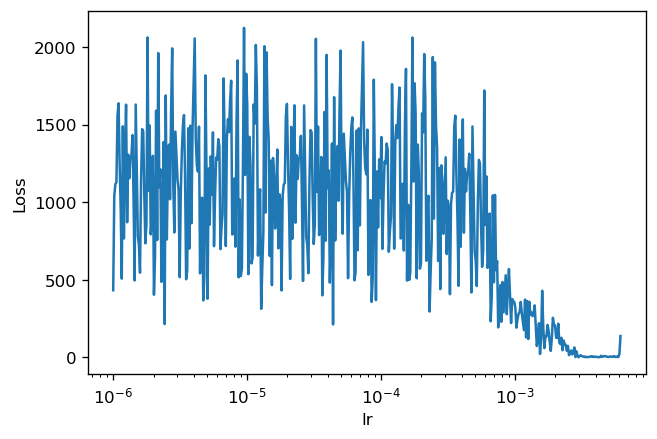

Sliceable plot. Can...
- p[a:b]: to focus on a specific range of the plot
- p.yscale("log"): to perform operation as if you're using plt

Reminder: slice range here is actually [0, 1], because it's kinda hard to slice the normal way

In [105]:
l.ParamFinder.plot(samples=1000)[:]

Epoch cancelled: .


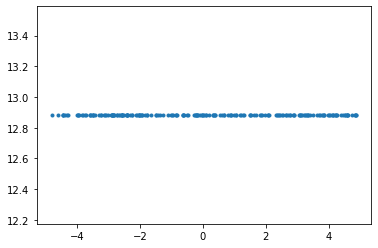

In [95]:
l.evaluate()

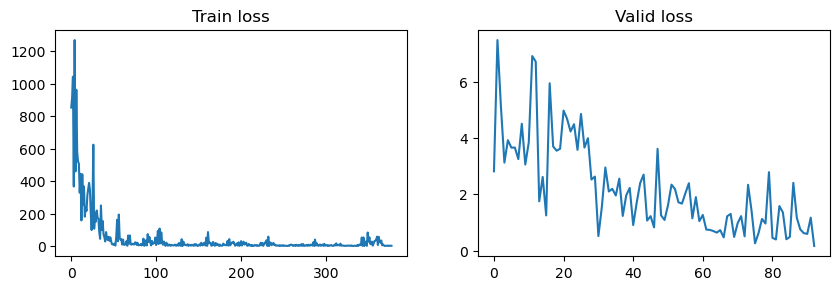

Sliceable plot. Can...
- p[a:b]: to focus on a specific range of the plot
- p.yscale("log"): to perform operation as if you're using plt

Reminder: the actual slice you put in is for the training plot. The valid loss's plot will update automatically to be in the same time frame

In [88]:
l.Loss.plot()


Progress: 100%          8/8 Finished [-3.2, 3.2] range                               3/8 Finished [-1, 1] range       

/home/kelvin/anaconda3/envs/torch/lib/python3.8/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/home/kelvin/anaconda3/envs/torch/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:109: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


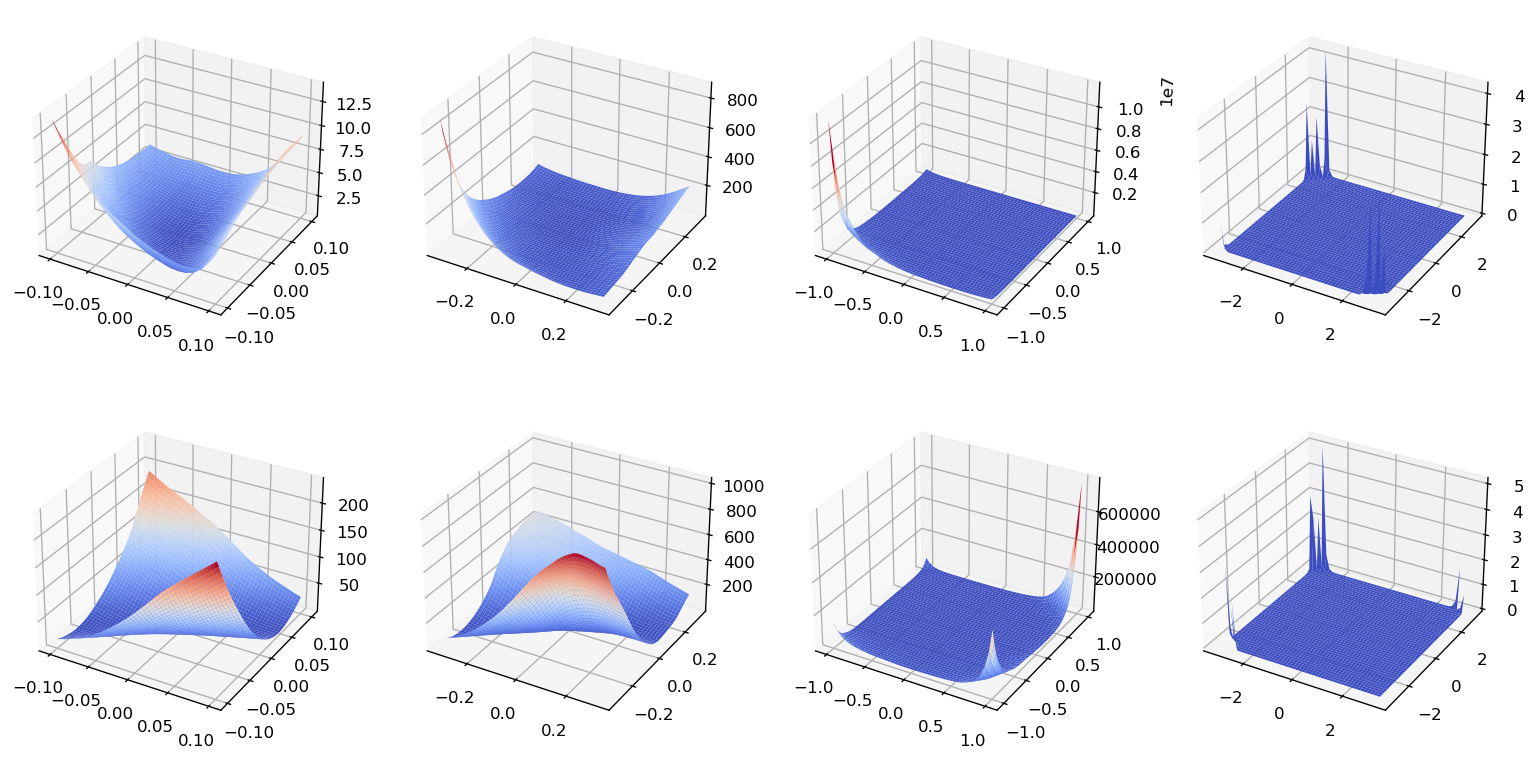

In [91]:
l.LossLandscape.plot()

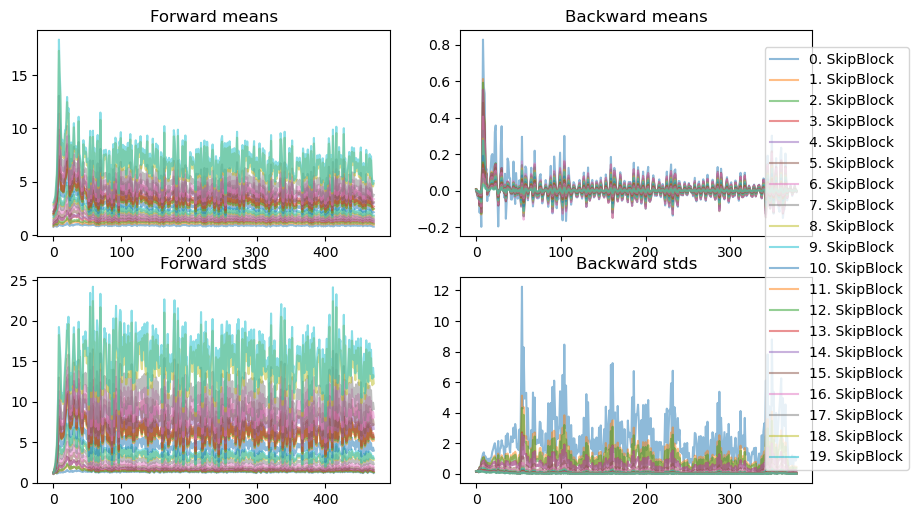

Sliceable plot. Can...
- p[a:b]: to focus on a specific range of the plot
- p.yscale("log"): to perform operation as if you're using plt

In [89]:
l.HookModule.plot()

In [28]:
for m in a.children():
    print(m)

ModuleSelector:
bulk: Sequential                     
    0: Linear                         
    1: LeakyReLU                     selected    
    2: SkipBlock                     
        seq: Sequential                     
            0: Linear                         
            1: LeakyReLU                     selected    
            2: Linear                         
            3: LeakyReLU                     selected    
            4: Linear                         
            5: LeakyReLU                     selected    
    3: SkipBlock                     
        seq: Sequential                     
            0: Linear                         
            1: LeakyReLU                     selected    
            2: Linear                         
            3: LeakyReLU                     selected    
            4: Linear                         
            5: LeakyReLU                     selected    
    4: SkipBlock                     
        seq: Sequential

In [89]:
a.children[0].children[2].children[0]#.children[0]

seq: Sequential                     selected
    4>0: Linear                     selected
        4>1: LeakyReLU                     selected
        4>2: Linear                     selected
        4>3: LeakyReLU                     selected
        4>4: Linear                     selected
        4>5: LeakyReLU                     selected
        

In [23]:
l.run(50);

Progress:   8%, epoch:  3/50, batch: 148/157, elapsed:   9.55s  Run cancelled: Low loss 1 achieved!.
Saved to autosave-2.pth


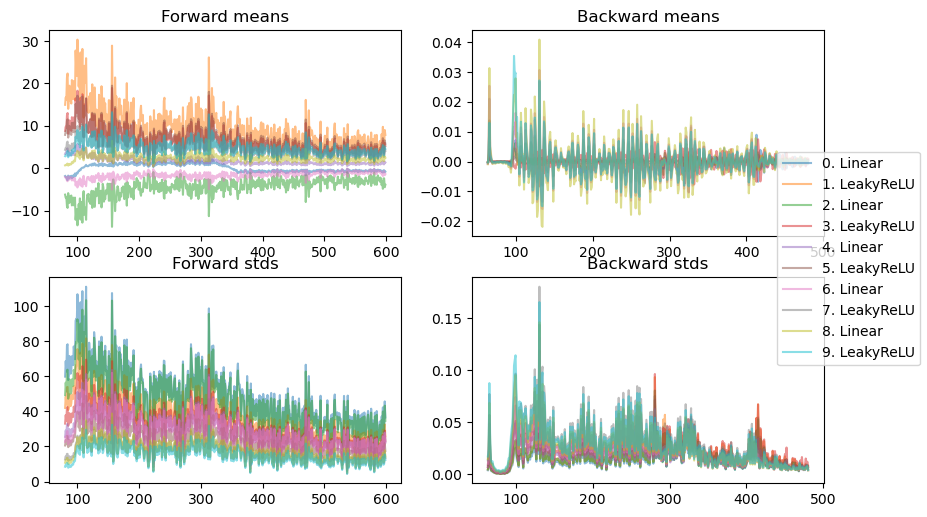

Sliceable plot. Can...
- p[a:b]: to focus on a specific range of the plot
- p.log: to display plot using log scale

In [29]:
l.HookModule[20:30].plot()[80:600]

Epoch cancelled: .


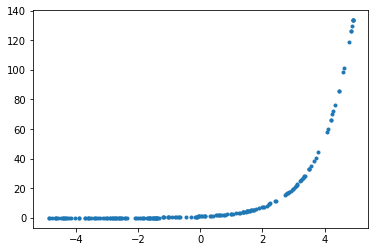

In [16]:
l.evaluate()

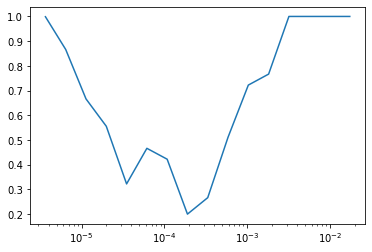

In [21]:
n = 3
plt.plot(k1lib.smooth(lrs, n), k1lib.smooth(progresses, n))
plt.xscale("log")

In [39]:
with open("bs-loss/data.pth", "wb") as f:
    pickle.dump(k1lib.Object.fromDict({"bss": bss, "progresses": progresses}), f)

In [47]:
l = newL()

In [49]:
l.run(10);

Progress: 3%, epoch: 0/10, batch: 39/126, elapsed: 0.12s         Run cancelled: Explosion detected!.
Saved to autosave-2.pth


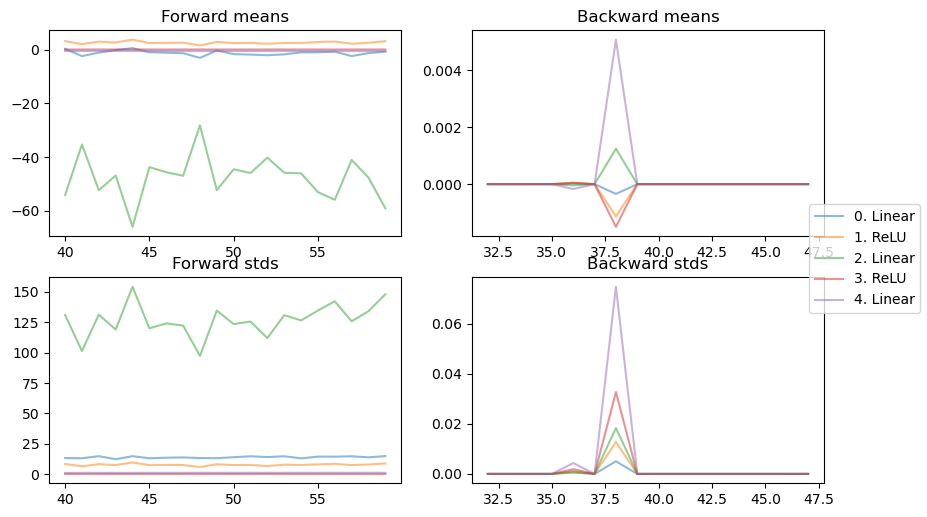

Sliceable plot. Can...
- p[a:b]: to focus on a specific range of the plot
- p.log: to display plot using log scale

In [31]:
l.HookModule[2:7].plot()[40:60]

Epoch cancelled: .


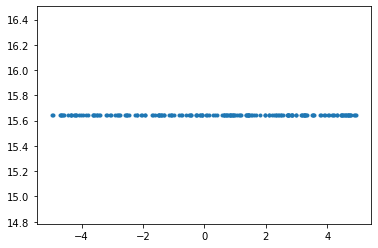

In [17]:
l.evaluate()

In [6]:
x, y = l.data.train.sample
x = x[:, None].to(torch.float32)
y = y.to(torch.float32);
a, b, c, d, e, f, g = l.model.bulk
(((d(c(b(a(x)))))));

In [8]:
l.run(10);

Progress: 6%, epoch: 0/10, batch: 79/126, elapsed: 0.24s         Run cancelled: Explosion detected!.
Saved to autosave-2.pth


In [9]:
l.cbs.Autosave.endRun()

Saved to autosave-2.pth


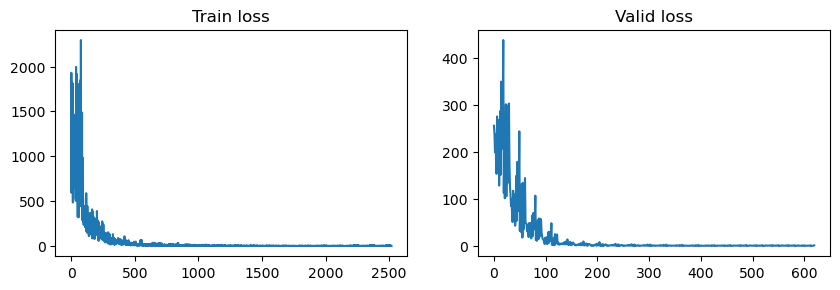

Sliceable plot. Can...
- p[a:b]: to focus on a specific range of the plot

Reminder: the actual slice you put in is for the training plot. The valid loss's plot will update automatically to be in the same time frame

In [18]:
l.Loss.plot()

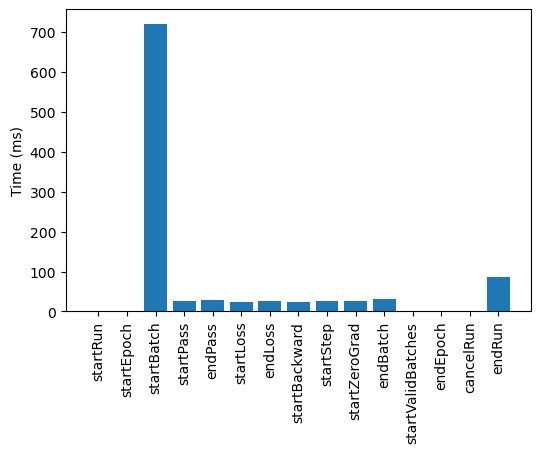

In [19]:
l.cbs.timings.plot()

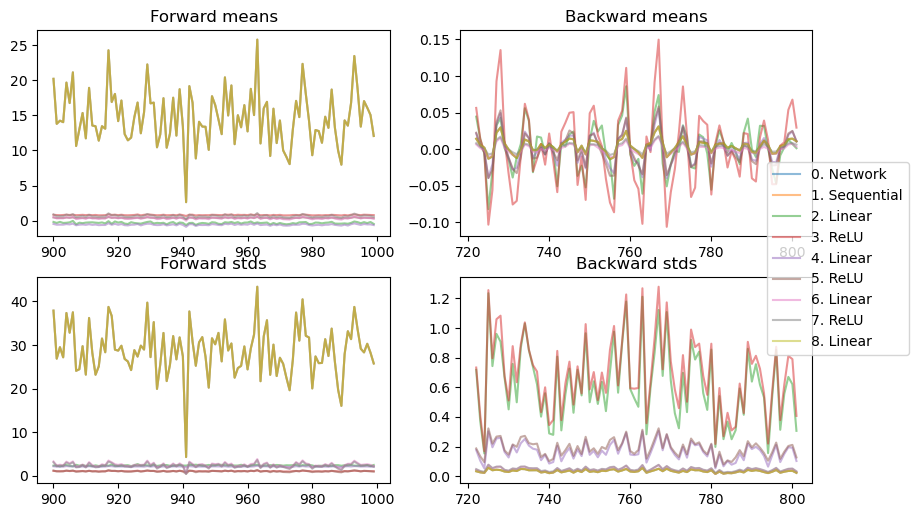

Sliceable plot. Can...
- p[a:b]: to focus on a specific range of the plot
- p.log: to display plot using log scale

In [9]:
l.HookModule.plot()[900:1000]

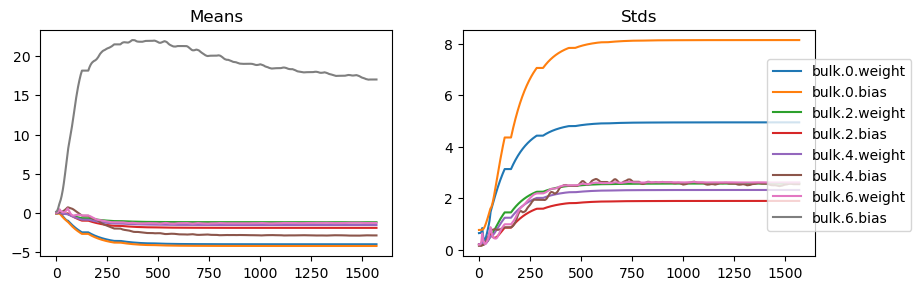

Sliceable plot. Can...
- p[a:b]: to focus on a specific range of the plot

In [18]:
l.HookParam.plot()

In [35]:
l.save("l-1.pth")

Saved to l-1.pth


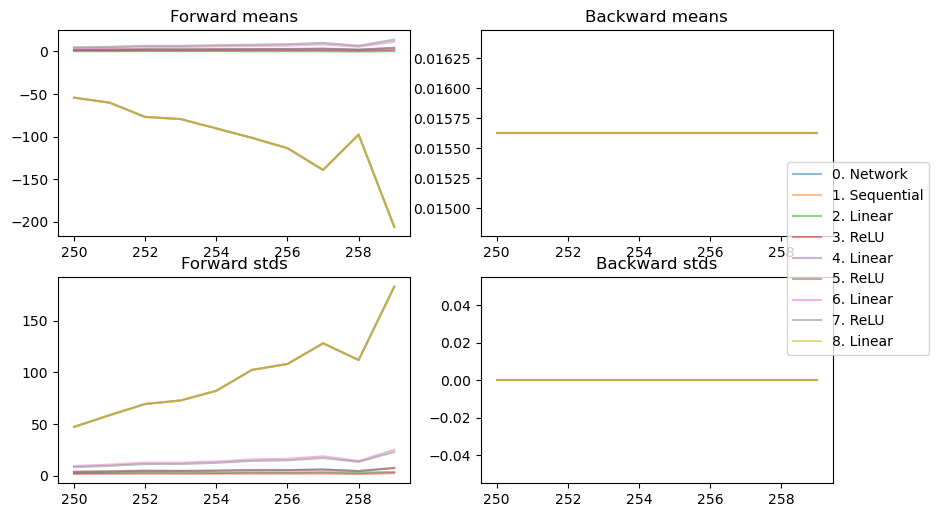

Sliceable plot. Can...
- p[a:b]: to focus on a specific range of the plot
- p.log: to display plot using log scale

In [43]:
l.HookModule[:9].plot()[250:260]

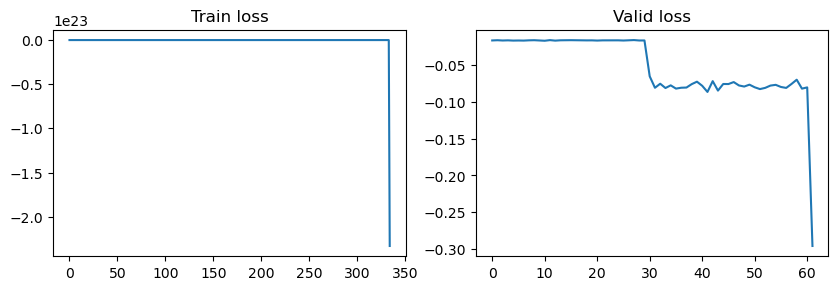

Sliceable plot. Can...
- p[a:b]: to focus on a specific range of the plot

In [34]:
l.Loss.plot()